# LAYOFF ANALYSIS 

Project explores a Dataframe of Layoffs Data from 2020-2022, consequently to Covid-19 Pandemic and beginning of Inflation

Original dataset can be tracked at https://layoffs.fyi/

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
# Missing Data
import missingno as msng

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

#### Reveal DataFrame

In [90]:
df = pd.read_csv('/Users/saralombardo/Dropbox/SL22020003093/layoffs_data.csv')
df

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,JD.ID,Jakarta,Retail,200.0,0.30,2022-12-14,https://jakartaglobe.id/business/jdid-layoffs-...,5100.0,IPO,2022-12-15 02:19:38,Indonesia,Unknown
1,GoStudent,Vienna,Education,100.0,NaN,2022-12-14,https://www.businessinsider.com/gostudent-3-bi...,686.0,Series D,2022-12-15 02:11:42,Austria,Unknown
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,https://www.restaurantbusinessonline.com/amp/t...,64.0,Series C,2022-12-15 02:10:04,United States,Unknown
3,Landing,Birmingham,Real Estate,NaN,NaN,2022-12-14,https://www.al.com/business/2022/12/birmingham...,347.0,Series C,2022-12-15 02:10:48,United States,Unknown
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,Internal memo,698.0,Series I,2022-12-13 20:12:50,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
1804,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,Unknown
1805,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,Unknown
1806,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,Unknown
1807,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,Unknown


#### Exploring Columns

In [91]:
df.columns

Index(['Company', 'Location', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')

#### Columns Identification:
Company = Name of the Company

Location = Location of the Company

Laid_Off_Count	 = Total count of Layoff

Percentage = Percentage of layoff

Date = Date of Layoff 

Source = Data gathered from source

Funds_Raised = Total Funds raised , according to the corresponding Stage

Stage = Financial Stage of the company (Fundings)

Date_added = date the data were added into database

Country = Country where the company is located

List_of_Employees_Laid_Off = link to g_docs of employee list

#### Exploring Rows

In [92]:
# Finding number of Rows
df.shape[0]

1809

Size of the database contains 1890 rows, insertion of Data

# DATA CLEANING

In [93]:
# drop duplicates: rows
df.drop_duplicates(inplace=True)
# check
df.shape[0]

1809

## MISSING DATA

<AxesSubplot: >

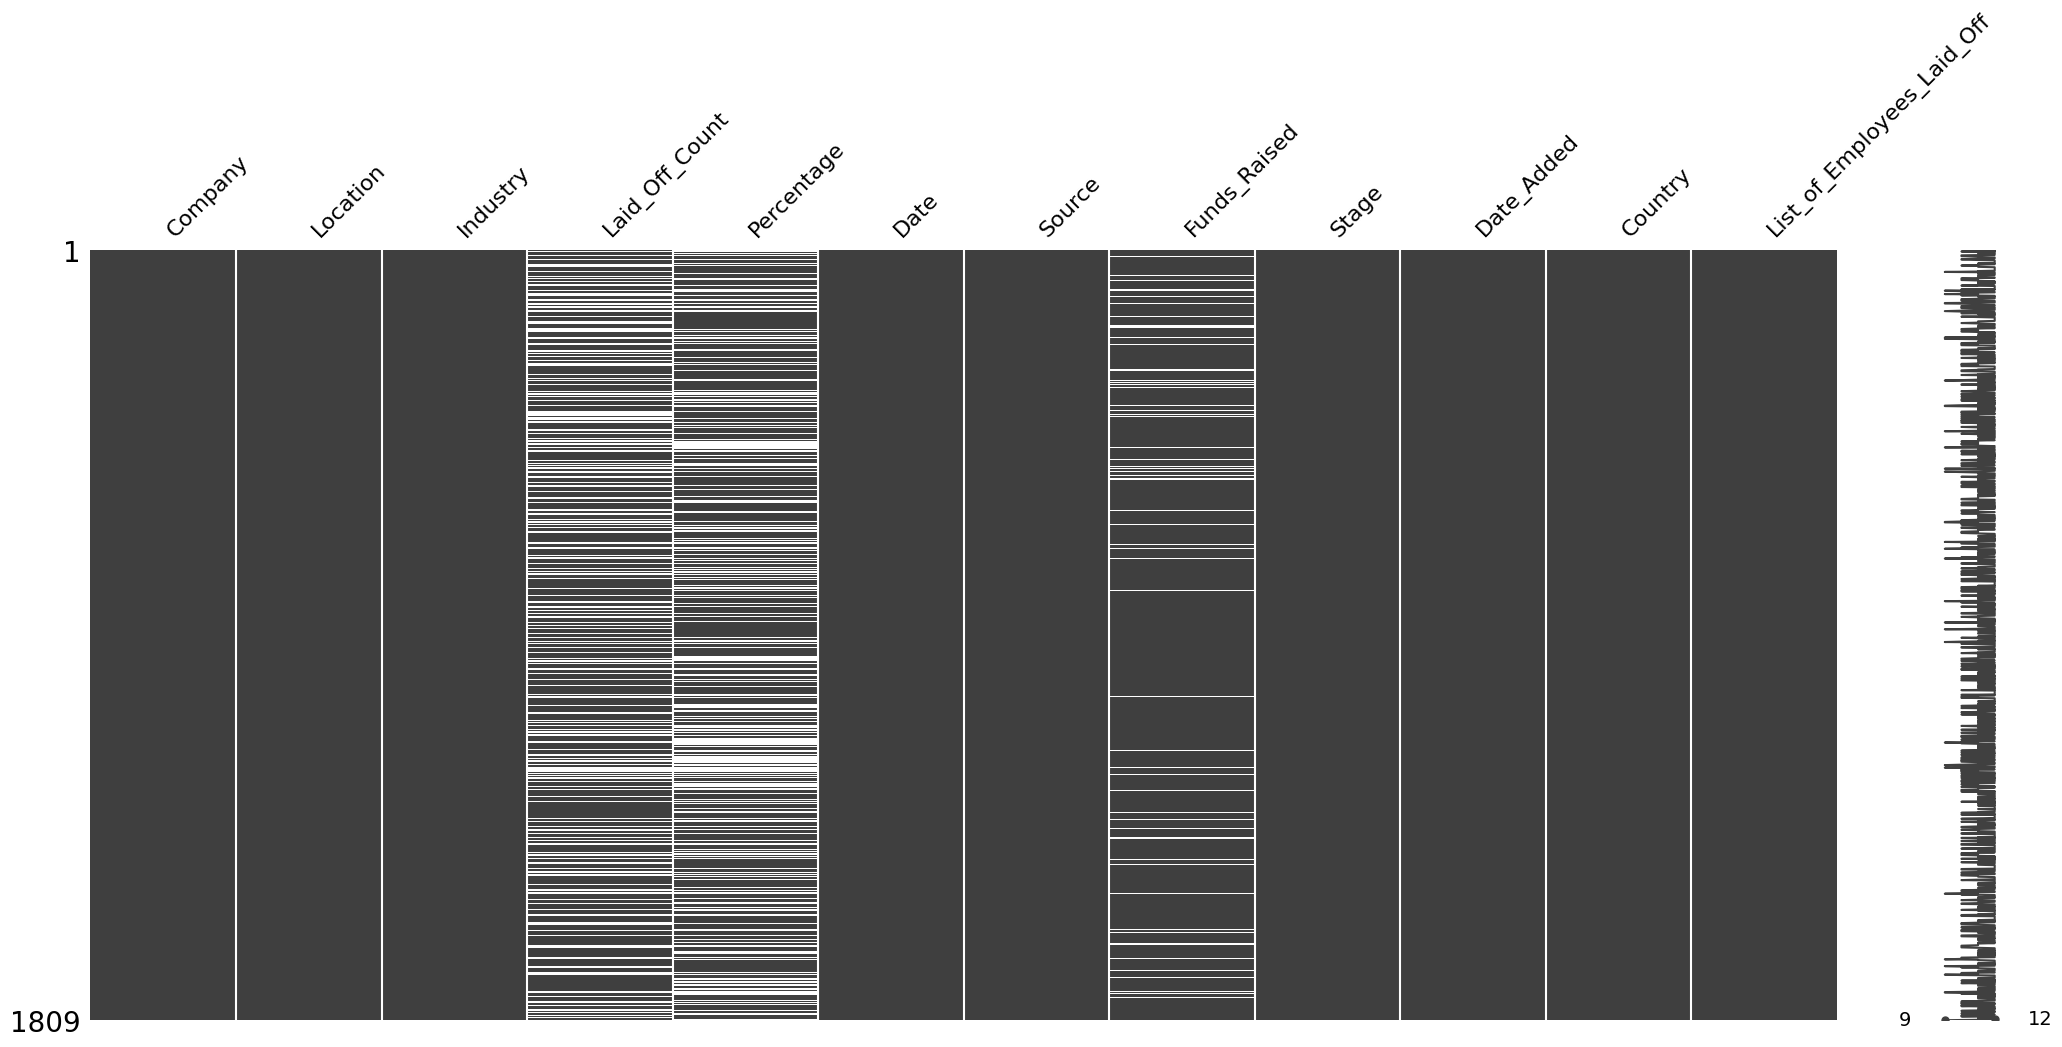

In [94]:
msng.matrix(df)

In [95]:
# Data not relevant to the data exploration
df.drop(['List_of_Employees_Laid_Off',
         'Source',
        'Date_Added',], axis=1, inplace=True)

In [96]:
# considering nan values in df
tot_nan = df.isnull().sum()
tot_nan

Company             0
Location            0
Industry            0
Laid_Off_Count    539
Percentage        588
Date                1
Funds_Raised      134
Stage               0
Country             0
dtype: int64

In [97]:
#df["Laid_Off_Count"].fillna(0, inplace=True)

In [98]:
df.dropna(inplace=True)

In [99]:
# considering nan values in df
tot_nan = df.isnull().sum()
tot_nan

Company           0
Location          0
Industry          0
Laid_Off_Count    0
Percentage        0
Date              0
Funds_Raised      0
Stage             0
Country           0
dtype: int64

## DATA INCONSISTENCY
Exploring occurences of Data Inconsistency:

In [100]:
df.dtypes

Company            object
Location           object
Industry           object
Laid_Off_Count    float64
Percentage        float64
Date               object
Funds_Raised      float64
Stage              object
Country            object
dtype: object

__One Error__: 'Date' columns is saved as object and  needs to be converted to datetime64 

#### Convert Date Object ->  datetime64

In [101]:
from datetime import date
# create a new column, date_parsed, with the parsed dates
df['date_parsed'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['date_parsed'].dtype

dtype('<M8[ns]')

# *--  DATA ANALYSIS --                        *

### Layoff Data by Company

In [102]:
#Laid_Off_Count
companies = df.groupby('Company').mean(numeric_only=True)
companies = companies.sort_values(by= 'Laid_Off_Count', ascending=False)
companies.head(40)

,Laid_Off_Count,Percentage,Funds_Raised
Company,,,
Meta,11000.000000,0.130000,26000.000000
Amazon,10000.000000,0.030000,108.000000
Cisco,4100.000000,0.050000,2.000000
Twitter,3700.000000,0.500000,12900.000000
Byju's,2500.000000,0.050000,5500.000000
Carvana,2000.000000,0.100000,1600.000000
Better.com,1950.000000,0.210000,905.000000
Airbnb,1900.000000,0.250000,5400.000000
Uber,1881.250000,0.187500,24700.000000


#### Returning Number of companies in the df

In [103]:
companies.shape[0]

783

There are __783__ companies in our Dataframe

#### Top 20 Companies

In [104]:
# Selecting top 20 Companies with highest 'Laid_Off_Count'
top_20 = companies.iloc[0:20, 0 ]
top_20

Company
Meta           11000.000000
Amazon         10000.000000
Cisco           4100.000000
Twitter         3700.000000
Byju's          2500.000000
Carvana         2000.000000
Better.com      1950.000000
Airbnb          1900.000000
Uber            1881.250000
Groupon         1650.000000
PaisaBazaar     1500.000000
Ola             1400.000000
Peloton         1361.333333
GoTo Group      1300.000000
Toast           1300.000000
Snap            1280.000000
DoorDash        1250.000000
Zillow          1150.000000
Crypto.com      1130.000000
Kraken          1100.000000
Name: Laid_Off_Count, dtype: float64

#### Funds Raised by the Companies with HIghest Kayoff

Text(0.5, 1.0, 'Funds Raised by the Compnaies with Highest Layoff')

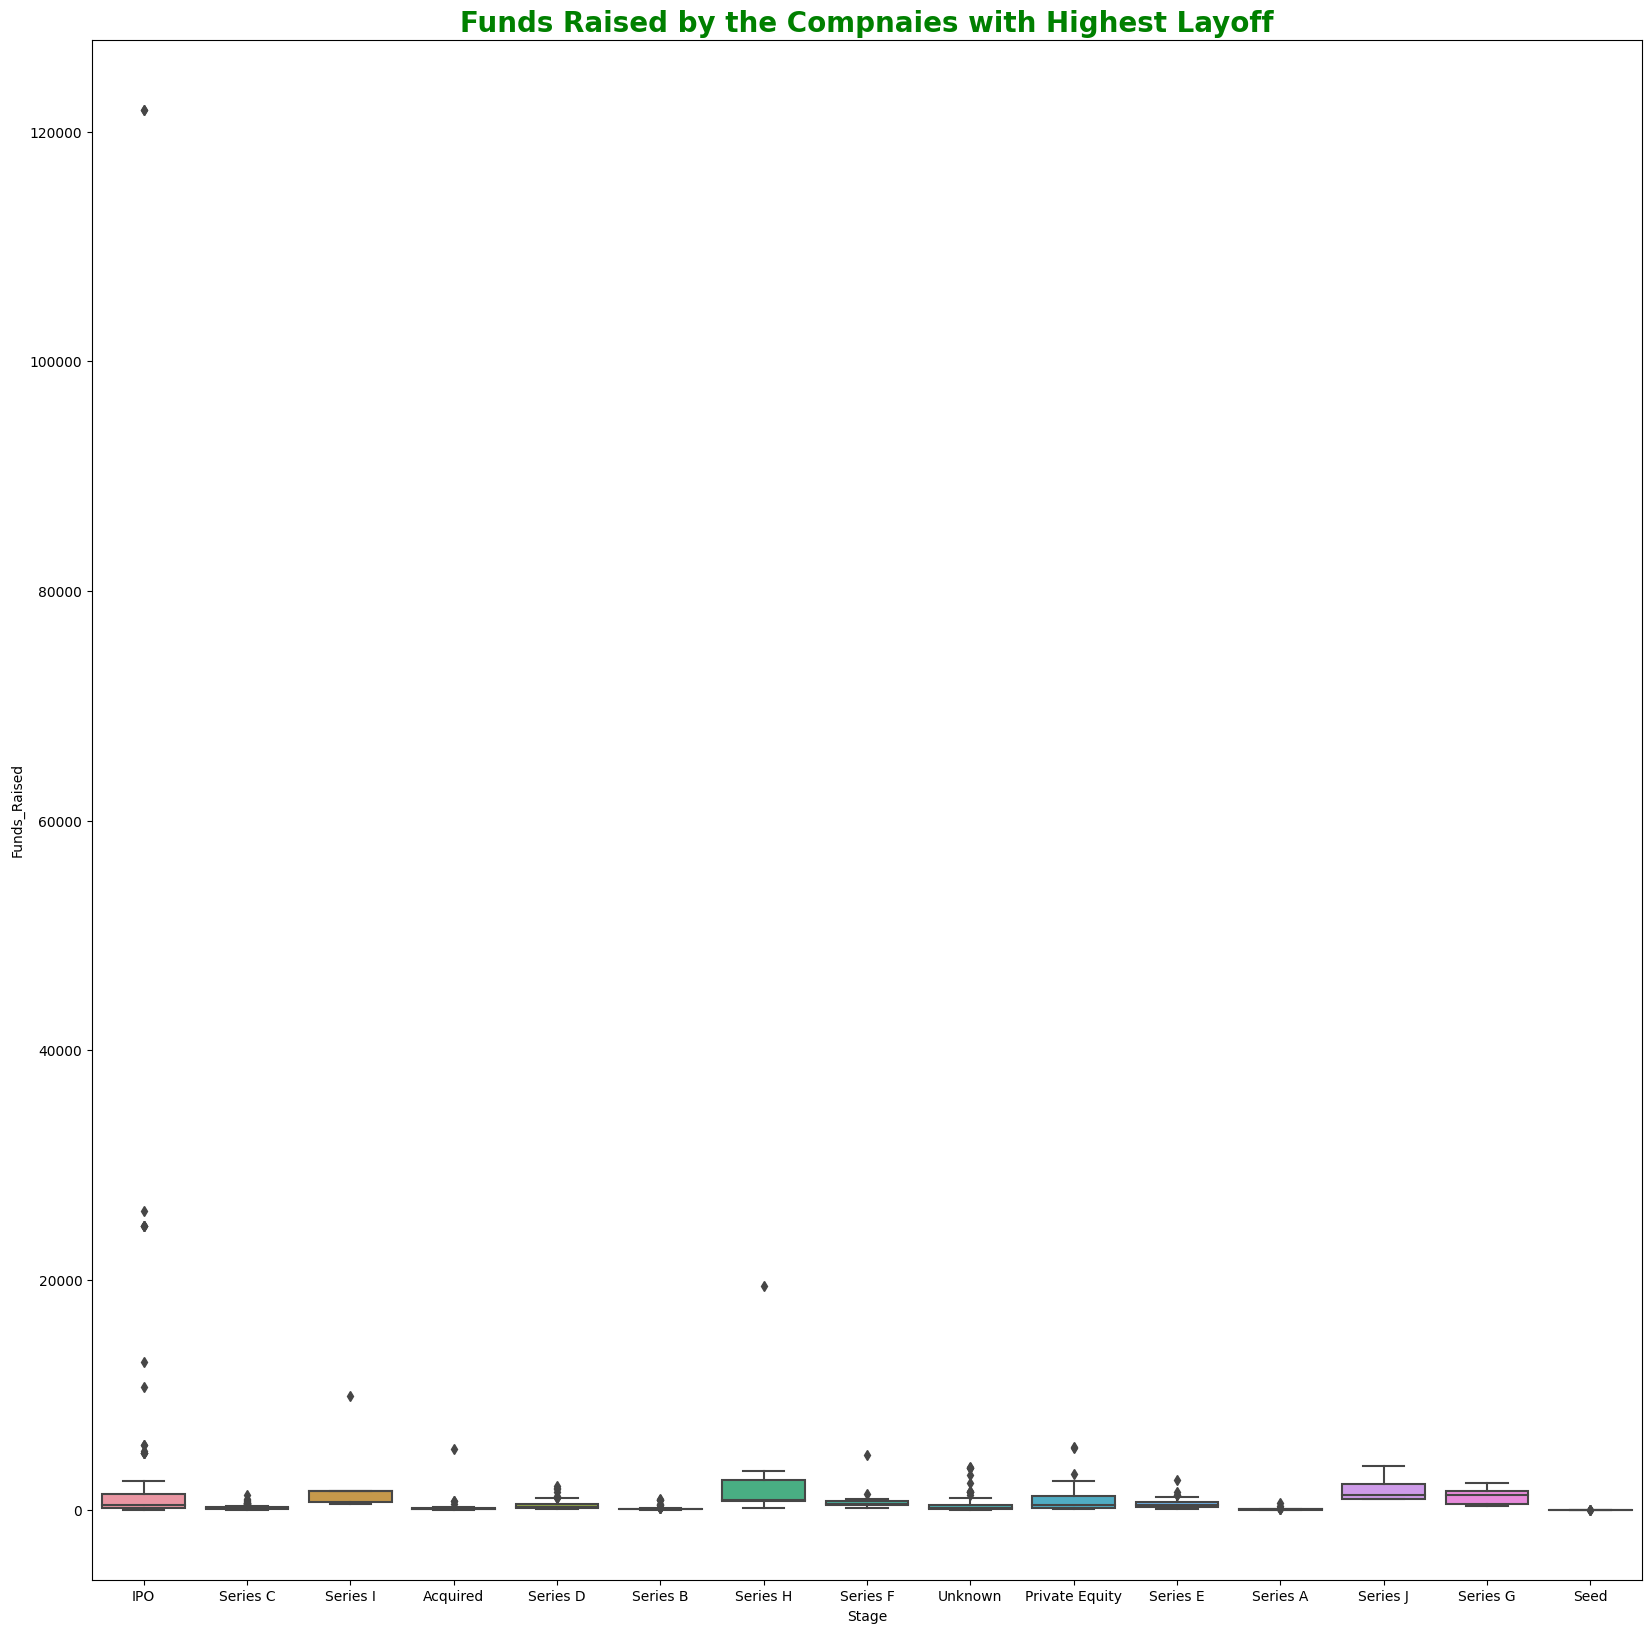

In [105]:
plt.rcParams['figure.figsize']=(20,20)
# plot
ax = sns.boxplot(x= 'Stage' , y = 'Funds_Raised'  , data=  df )
plt.title('Funds Raised by the Compnaies with Highest Layoff', fontweight='bold', color='green', size=20)

#### Highest Layoff by Company's Stage

Text(0.5, 1.0, "Highest Layoff by Company's Stage")

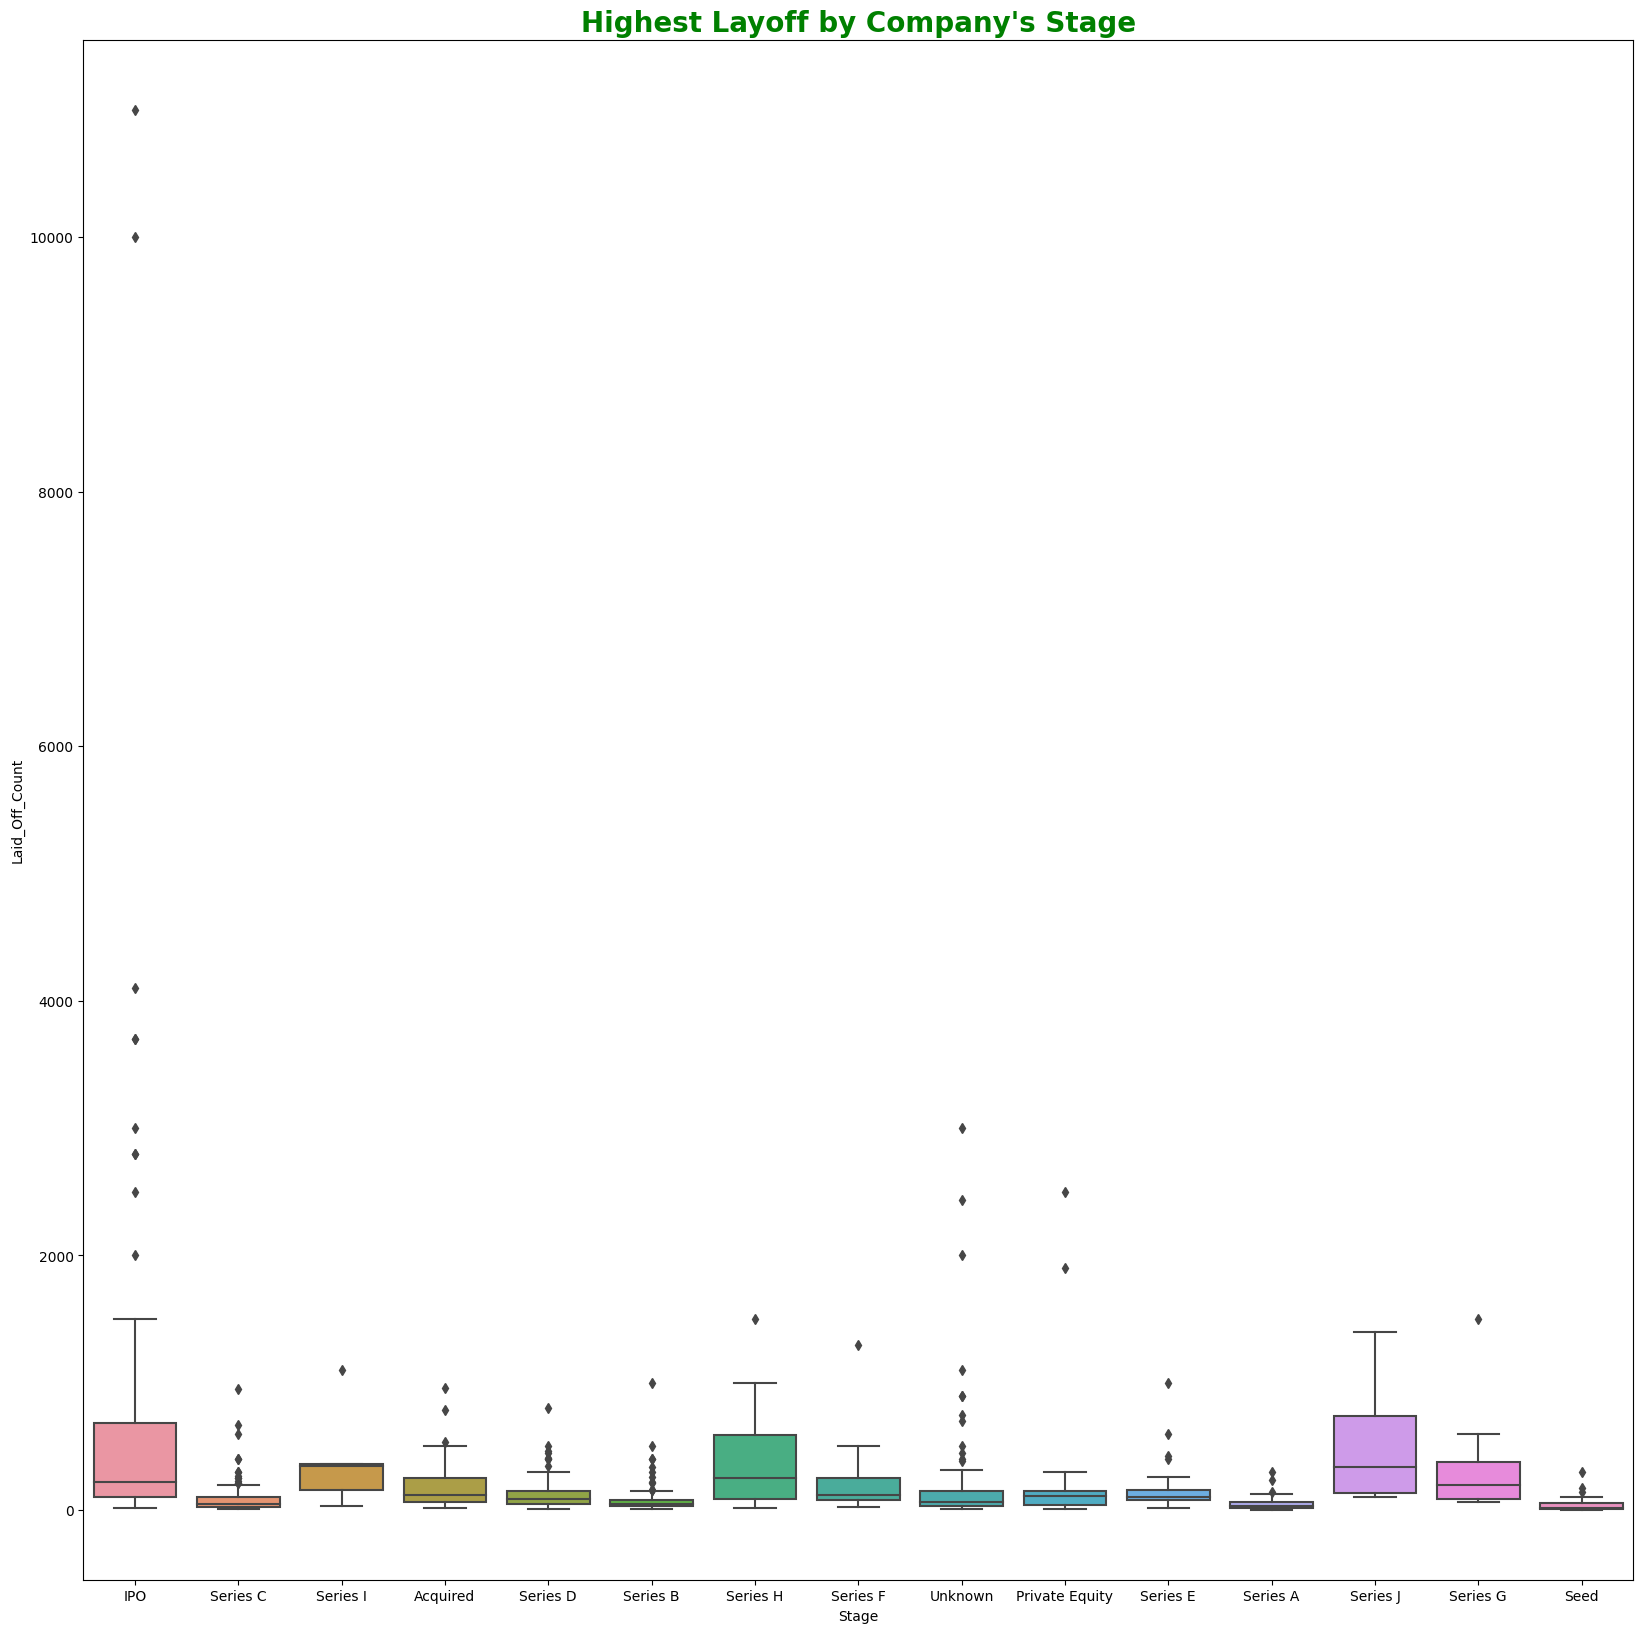

In [106]:
plt.rcParams['figure.figsize']=(20,20)
# plot
ax = sns.boxplot(x= 'Stage' , y = 'Laid_Off_Count'  , data=  df )
plt.title('Highest Layoff by Company\'s Stage', fontweight='bold', color='green', size=20)

####  LAYOFF DISTRIBUTION

Text(0.5, 1.0, 'LAYOFF DISTRIBUTION')

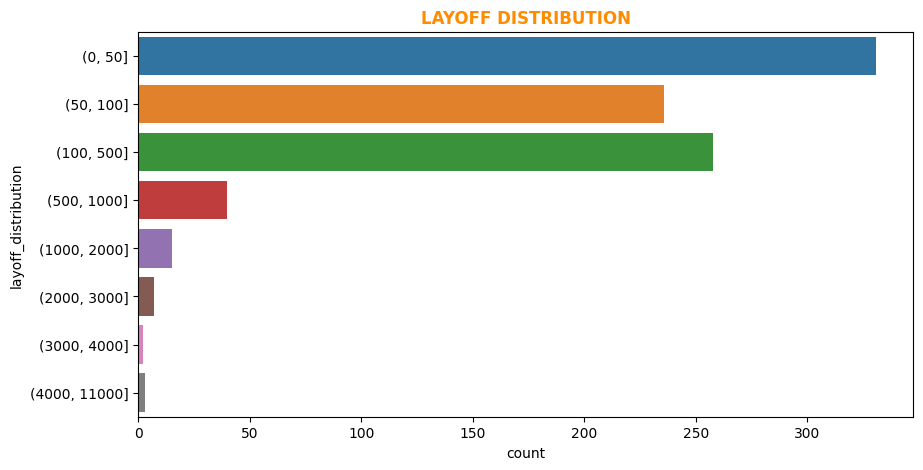

In [107]:
# Use 
df['layoff_distribution'] = pd.cut( df['Laid_Off_Count'], [0, 50, 100, 500, 1000, 2000, 3000, 4000, 11000 ] )

fig = plt.figure(figsize=(10,5))
sns.countplot(y= df['layoff_distribution'], data=df );
plt.title('LAYOFF DISTRIBUTION', color='darkorange', fontweight='bold')

Most of the companies have moderate range of layoff , under 50 people

#### Highest layoff by Company

In [148]:
#### Layoff Count
laidoff_count = df.groupby('Company').mean(numeric_only=True)
laidoff_count = laidoff_count.sort_values(by = 'Laid_Off_Count', ascending = False )

Text(0.5, 1.0, 'TOP 20 HIGHEST LAYOFF BY COMPANY')

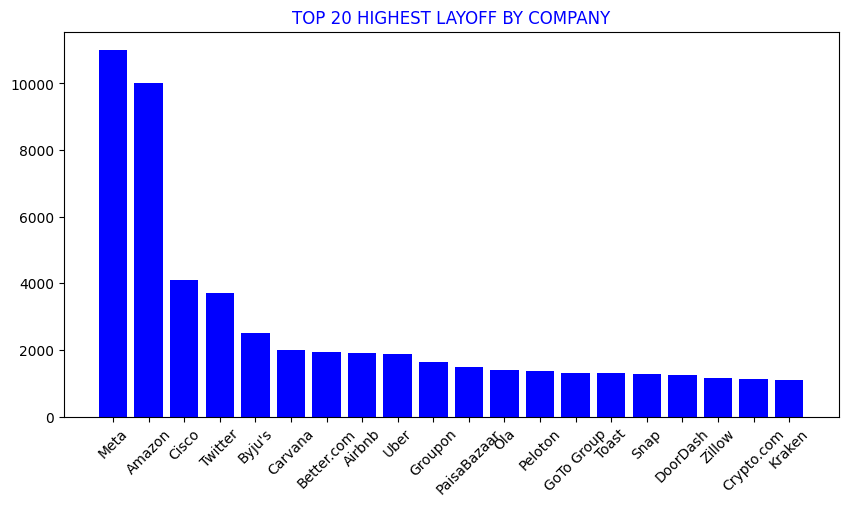

In [150]:
plt.figure(figsize = (10,5))
# DATA:
''' ** top_20 = companies.iloc[0:20, 0 ]
x = top_20.index -> assign label to each bar
y = top_20 -> list the first 20 company ordered by highest layoff results
'''
plt.bar( top_20.index, top_20 , color='blue' )
# labelling
plt.xticks(rotation = 45)
plt.title('TOP 20 HIGHEST LAYOFF BY COMPANY', color='blue')

#### Industry with the highest layoff

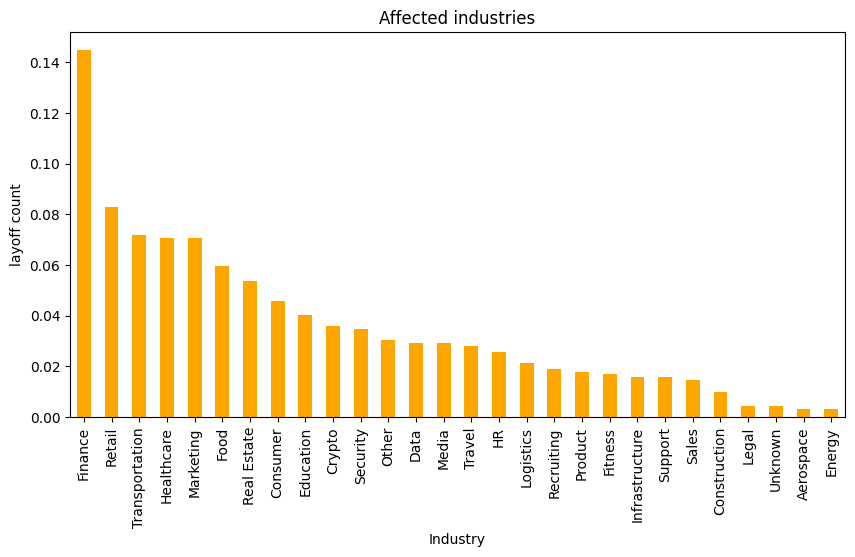

In [110]:
by_industry = df.groupby('Industry').mean(numeric_only=True)
# plot
df['Industry'].value_counts(normalize=True).plot(figsize=(10,5),kind='bar',color='orange')
plt.title("Affected industries")
plt.ylabel('layoff count')
plt.xlabel('Industry');
plt.show()

#### Most affected companies

In [111]:
#Laid_Off_Count
companies = df.groupby('Company').mean(numeric_only=True)
companies = companies.sort_values(by= 'Percentage', ascending=False)
companies.head(40)

,Laid_Off_Count,Percentage,Funds_Raised
Company,,,
Reali,140.0,1.00,117.0000
Metigy,75.0,1.00,18.0000
BeyondMinds,65.0,1.00,16.0000
Planetly,200.0,1.00,5.0000
Playdots,65.0,1.00,10.0000
Pocketmath,21.0,1.00,20.0000
Bluprint,137.0,1.00,108.0000
Bridge Connector,154.0,1.00,45.0000
Butler Hospitality,1000.0,1.00,50.0000


#### Countries most affected by Layoff

Text(0.5, 1.0, 'TOTAL LAYOFF BY COUNTRY')

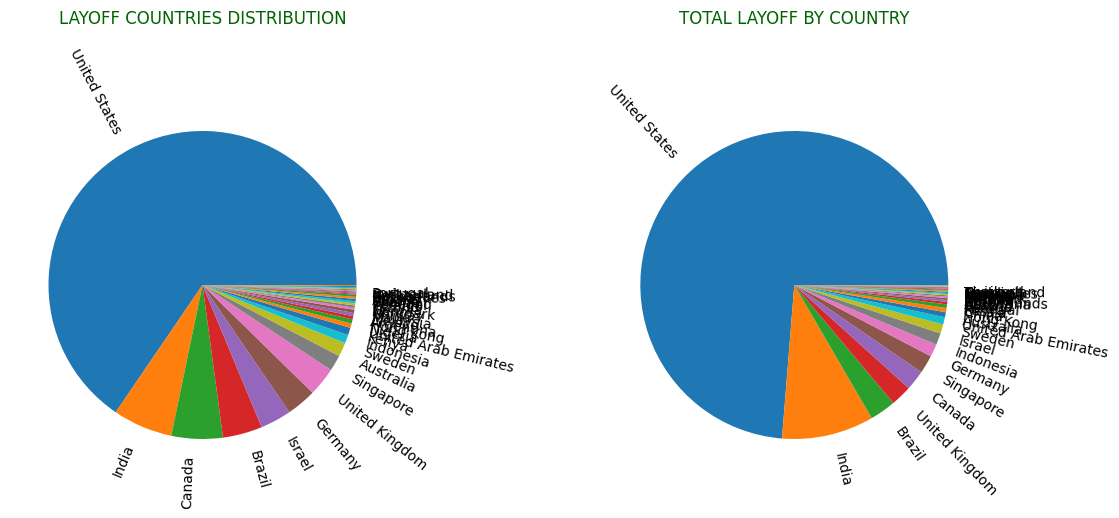

In [112]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5))
# -------------------------------------------------------------------------- PIE 1 : 
# Count the occurrence a company applied layoff by Country
pie1_data = df['Country'].value_counts(normalize=True)
# Plot
ax1.pie( pie1_data, labels= pie1_data.index, rotatelabels = 45)
# Labelling
ax1.set_title('LAYOFF COUNTRIES DISTRIBUTION', pad =50, color='darkgreen')
# -------------------------------------------------------------------------- PIE 2:
# Data
by_country = df.groupby('Country').sum(numeric_only=True)
by_country = by_country.sort_values(by= 'Laid_Off_Count', ascending=False)
pie2_data = by_country['Laid_Off_Count']
# Plot
ax2.pie( list(pie2_data), labels= list(pie2_data.index),  rotatelabels = 45 )
# labelling
ax2.set_title("TOTAL LAYOFF BY COUNTRY", color='darkgreen', pad=50)

### EDA ANALYSIS
The __First__ Pie Char aimed to calculated the amount of people who lost their job, locating the correspective country.

The __Second__ Pie Char calculated instead the occurencies of the origin of a company, finfing out how many compnay were affected in a country compared with others.
> Results

Most of the people in our data sample lost their jobs in __United States__ and __India__, which registered significantly the histest layoff

In __Uk__ less companies adoped layoff but an more people lost their jobs compared with other countries

## US Companies

In [113]:
us_companies = df[df['Country'] == 'United States' ]
us_companies

,Company,Location,Industry,Laid_Off_Count,Percentage,Date,Funds_Raised,Stage,Country,date_parsed,layoff_distribution
2,ChowNow,Los Angeles,Food,40.0,0.10,2022-12-14,64.0,Series C,United States,2022-12-14,"(0, 50]"
4,Thumbtack,SF Bay Area,Consumer,160.0,0.14,2022-12-13,698.0,Series I,United States,2022-12-13,"(100, 500]"
5,Edgio,Phoenix,Infrastructure,95.0,0.10,2022-12-13,462.0,IPO,United States,2022-12-13,"(50, 100]"
6,Komodo Health,SF Bay Area,Healthcare,78.0,0.09,2022-12-13,50.0,Series C,United States,2022-12-13,"(50, 100]"
7,Pluralsight,Salt Lake City,Education,400.0,0.20,2022-12-12,192.0,Acquired,United States,2022-12-12,"(100, 500]"
...,...,...,...,...,...,...,...,...,...,...,...
1801,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,79.0,Series C,United States,2020-03-16,"(100, 500]"
1802,Help.com,Austin,Support,16.0,1.00,2020-03-16,6.0,Seed,United States,2020-03-16,"(0, 50]"
1804,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,45.0,Unknown,United States,2020-03-13,"(0, 50]"
1805,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,1.0,Seed,United States,2020-03-13,"(0, 50]"


In [167]:
count_us_companies = us_companies.groupby('Company').mean()
count_us_companies.shape[0]

512

There are __512__ companies in US

## US DATA

/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_883/1945322442.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels( x_countries, rotation=45)
/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_883/1945322442.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(  us_stage['Company'].index,  rotation=45)
/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_883/1945322442.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(  top10_us_companies.index,  rotation=45)
/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_883/1945322442.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(  top10_us_companies.index,  rotation=45)


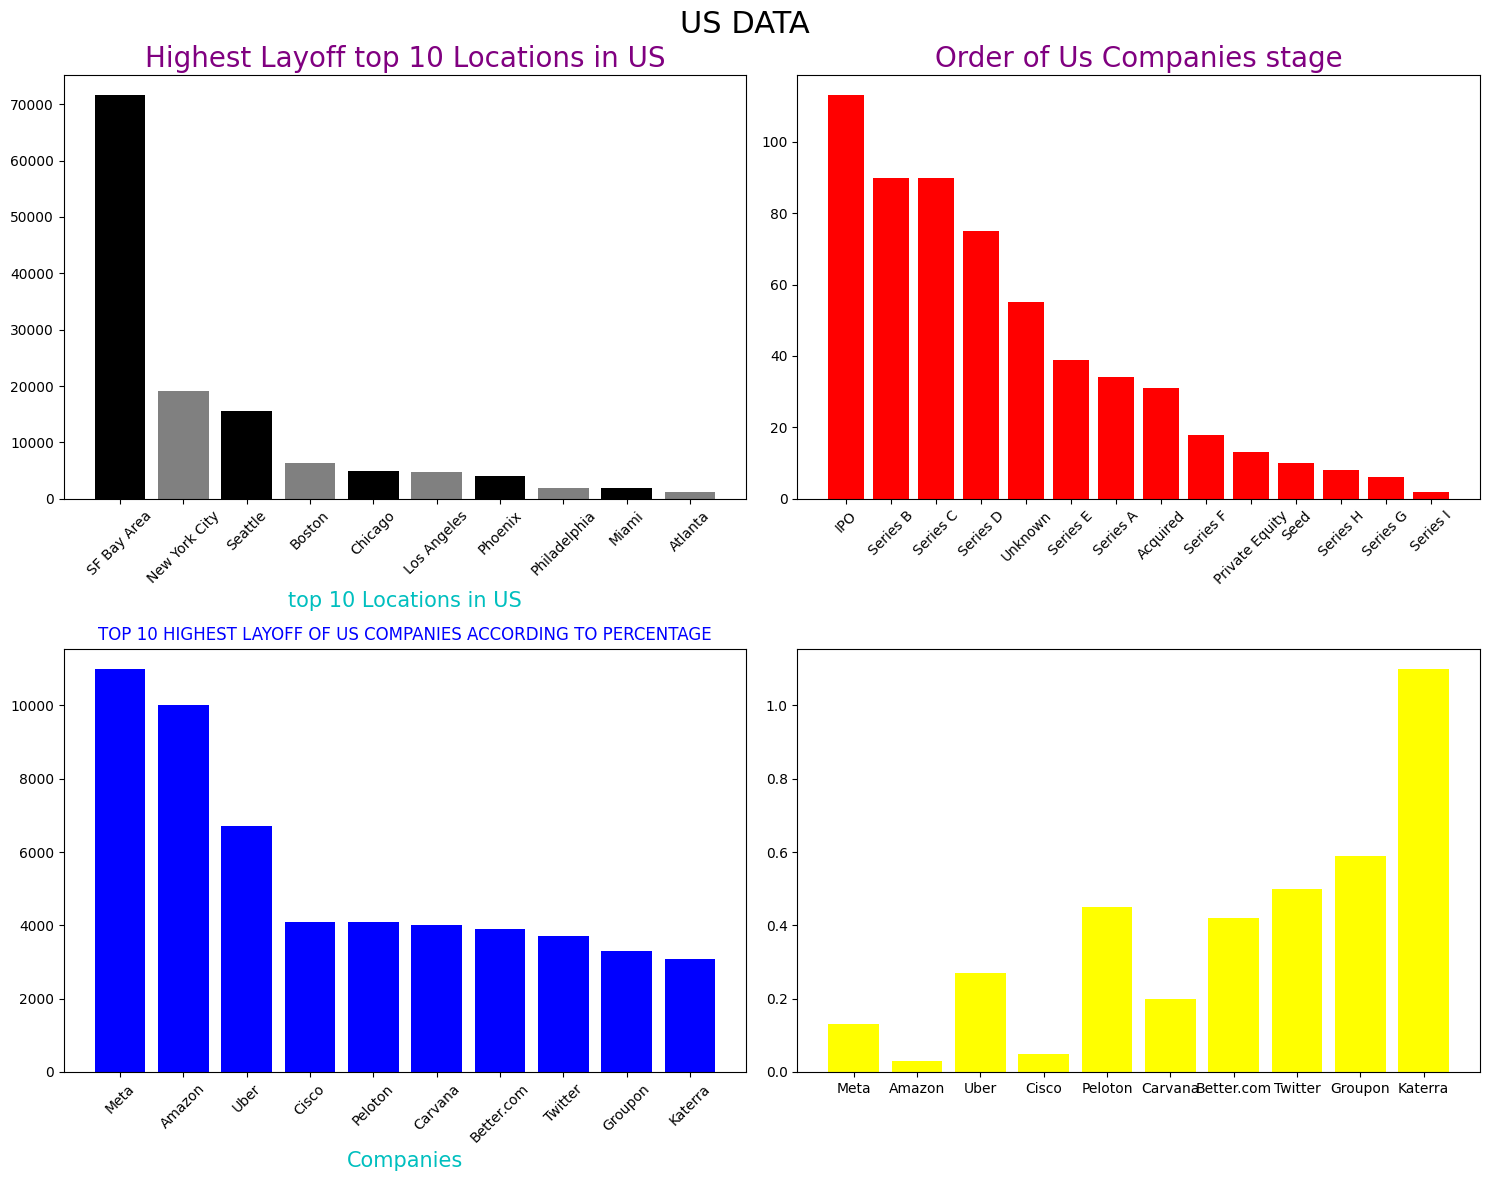

In [114]:
#--------------------------------------------- FUEL-TYPE ANALYSIS
# - set grid
fig, ax = plt.subplots(2,2, figsize=(15,12))
fig.suptitle('US DATA', size=22)
# us_companies
#--------------------------------------------------------- GRAPH 1:  LOCATION MOST AFFECTED BY LAYOFF
# data
by_location = us_companies.groupby('Location').sum(numeric_only=True)
by_location = by_location.sort_values(by= 'Laid_Off_Count', ascending=False)
# Returns 100 rows = 100 locations in total
# Cut to top 10 with highest layoff
top10_location = by_location.iloc[0:10, 0]
# Extract name of the countries
x_countries = top10_location.index
# color bars:
c_bars=['black', 'grey']
# plot:
ax[0,0].bar( x_countries, top10_location , color = c_bars )
# labelling
ax[0,0].set_xticklabels( x_countries, rotation=45)
ax[0,0].set_title('Highest Layoff top 10 Locations in US', color='purple', fontsize= 20)
ax[0,0].set_xlabel('top 10 Locations in US', color='c', fontsize= 15)
#--------------------------------------------------------- GRAPH 2:  COUNT WHICH STAGE WHERE MOST COMPANIES
# data
us_stage = us_companies.groupby(by='Stage').count()
us_stage = us_stage.sort_values('Laid_Off_Count' , ascending=False)
# plot:
ax[0,1].bar( us_stage['Company'].index , us_stage['Company'] , color = 'red' )
# labelling
ax[0,1].set_xticklabels(  us_stage['Company'].index,  rotation=45)
ax[0,1].set_title('Order of Us Companies stage', color='purple', fontsize= 20)
#--------------------------------------------------------- GRAPH 3: TOP MOST AFFECTED US COMPANIES ACCORDING TO TOT LAYOFF
# DATA:
us_companies = us_companies.groupby(by='Company').sum(numeric_only=True)
us_companies = us_companies.sort_values('Laid_Off_Count', ascending=False)
top10_us_companies = us_companies.iloc[0:10, 0]
#top10_corresponding_percentage = us_companies.iloc[0:10, 1]
# plot
ax[1,0].bar( top10_us_companies.index , top10_us_companies, color='blue' )
# labelling
ax[1,0].set_xticklabels(  top10_us_companies.index,  rotation=45)
ax[1,0].set_title('TOP 10 HIGHEST LAYOFF OF US COMPANIES', color='blue')
ax[1,0].set_xlabel('Companies', color='c', fontsize= 15)
#--------------------------------------------------------- GRAPH 4: TOP MOST AFFECTED US COMPANIES ACCORDING TO PERCENTAGE
# Data
top10_corresponding_percentage = us_companies.iloc[0:10, 1]
# PLOT
ax[1,1].bar( top10_us_companies.index ,top10_corresponding_percentage , color='yellow' )
# labelling
ax[1,0].set_xticklabels(  top10_us_companies.index,  rotation=45)
ax[1,0].set_title('TOP 10 HIGHEST LAYOFF OF US COMPANIES ACCORDING TO PERCENTAGE', color='blue' )
ax[1,0].set_xlabel('Companies', color='c', fontsize= 15)
# --------------------------------------

fig.tight_layout() 

#### INDUSTRIES' LAYOFF IN US

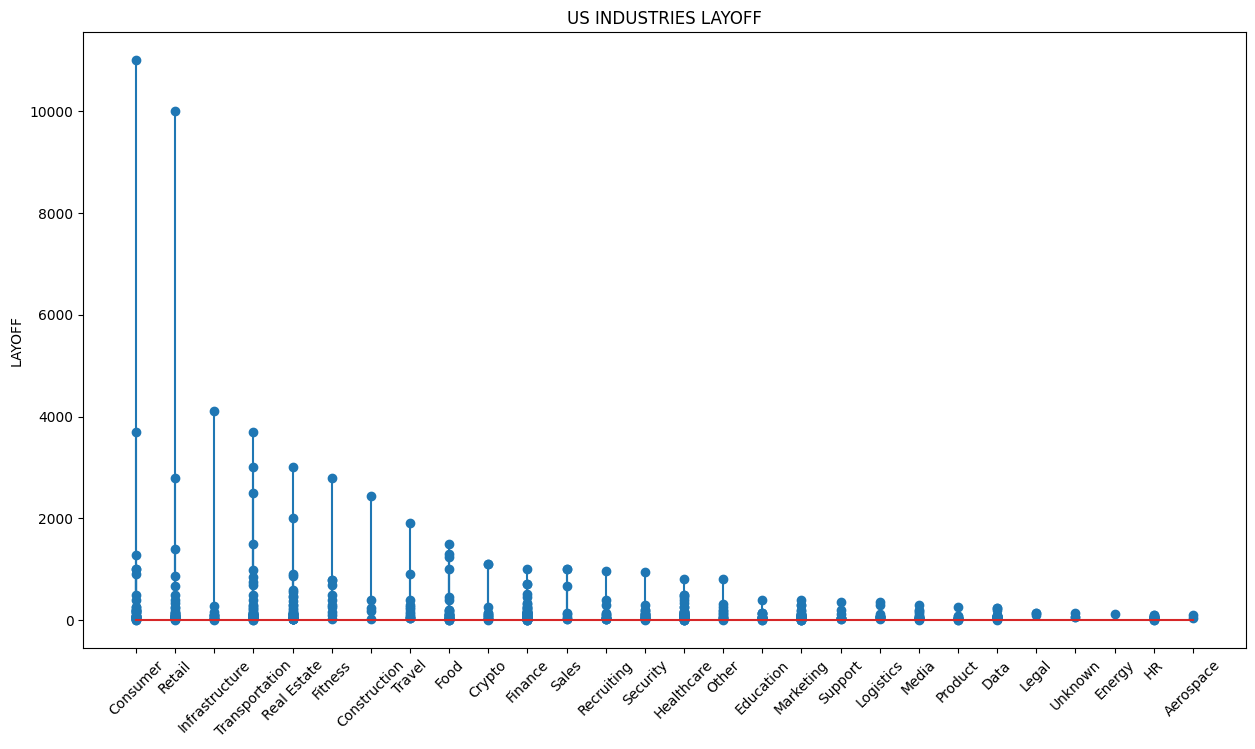

In [152]:
plt.rcParams['figure.figsize']=(15,8)

us_df = df[df['Country']=='United States']
us_df = us_df.sort_values('Laid_Off_Count' , ascending=False)
# 1192 rows = companies evaluated
# --------------------------------------------------------------PLOT
plt.stem( us_df['Industry'],   us_df['Laid_Off_Count'] )
# labelling
plt.xticks(rotation=45)
plt.title('US INDUSTRIES LAYOFF')
plt.ylabel('LAYOFF')
plt.show()

In [153]:
us_locations = us_companies.groupby(by='Location').sum(numeric_only=True)
us_locations.sort_values(by = 'Laid_Off_Count', ascending=False)
# 534 Companies

KeyError: 'Location'

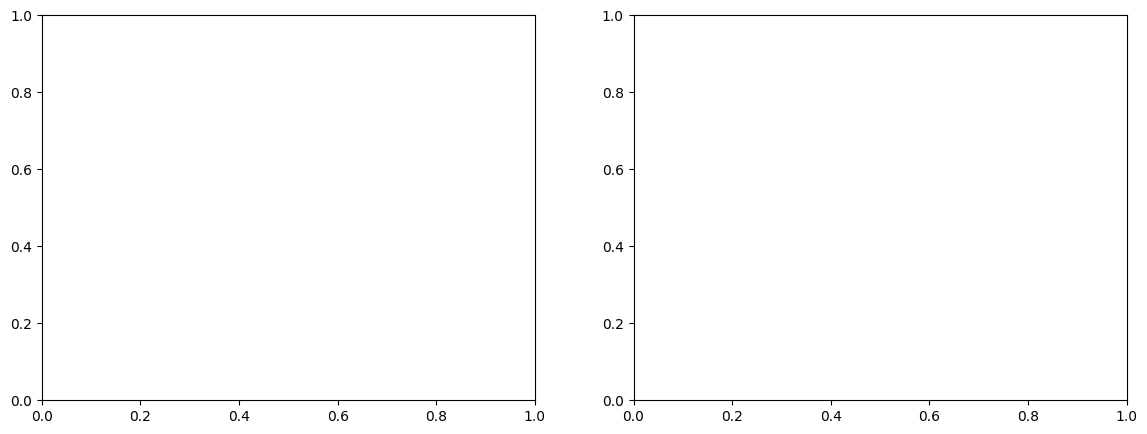

In [154]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5))

In [139]:
# Data
by_country = df.groupby('Country').sum(numeric_only=True)
by_country = by_country.sort_values(by= 'Laid_Off_Count', ascending=False)
#pie2_data = by_country['Laid_Off_Count']
# Plot
#ax2.pie( list(pie2_data), labels= list(pie2_data.index),  rotatelabels = 45 )
by_country

,Laid_Off_Count,Percentage,Funds_Raised
Country,,,
United States,141462.0,135.8725,596540.4000
India,18533.0,14.3300,75614.4000
Brazil,5236.0,7.2700,7732.7000
United Kingdom,4247.0,6.6500,15020.7000
Canada,4034.0,11.1800,7258.0000
Singapore,3661.0,4.4800,13595.9755
Germany,2574.0,7.3900,6419.6800
Indonesia,2361.0,0.9800,11857.0000
Israel,1847.0,7.2300,3265.0000


# WORLD DATA

### TOP 10 LOCATION MOST AFFECTED BY LAYOFF AROUND THE WORLD (OF OUR DATA SET)

#--------------------------------------------- FUEL-TYPE ANALYSIS
# - set grid
fig, ax = plt.subplots(2,2, figsize=(12,10))
#--------------------------------------------------------- GRAPH 1:  LOCATION MOST AFFECTED BY LAYOFF
# data
by_location = df.groupby('Location').sum(numeric_only=True)
by_location = by_location.sort_values(by= 'Laid_Off_Count', ascending=False)
# Returns 100 rows = 100 locations in total
# Cut to top 10 with highest layoff
top10_location = by_location.iloc[0:10, 0]
# Extract name of the countries
x_countries = top10_location.index
# color bars:
c_bars=['black', 'grey']
# plot:
ax[0,0].bar( x_countries, top10_location , color = c_bars )
# labelling
ax[0,0].set_xticklabels( x_countries, rotation=45)
ax[0,0].set_title('Highest Layoff top 10 Locations in US', color='purple')
ax[0,0].set_xlabel('top 10 Locations in US', color='c')

>

In [156]:
#laidoff_count.index.shape[0]
df['Company'].unique()
df['Company'].shape[0]

892

In [157]:
by_industry

,Laid_Off_Count,Percentage,Funds_Raised
Industry,,,
Aerospace,197.000000,0.700000,1033.666667
Construction,417.777778,0.292222,586.222222
Consumer,574.414634,0.279024,1427.573171
Crypto,216.500000,0.211250,275.562500
Data,75.038462,0.235385,347.784615
Education,199.666667,0.317500,322.861111
Energy,65.666667,0.166667,239.000000
Finance,126.286822,0.197713,441.869612
Fitness,547.866667,0.252000,576.666667


In [158]:
n_companies = df.groupby(by='Company').mean()
n_companies.shape[0]

/var/folders/m7/nd04n9m14gx4x780byggkvpr0000gn/T/ipykernel_883/3118425688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  n_companies = df.groupby(by='Company').mean()


783

Only __783 companies__ in total found in the dataset

In [160]:
count_percentage = n_companies['Percentage']
count_percentage

Company
&Open           0.090
10X Genomics    0.080
1stdibs         0.170
2TM             0.135
54gene          0.300
                ...  
ezCater         0.440
iFit            0.200
iPrice Group    0.200
iRobot          0.100
uShip           0.370
Name: Percentage, Length: 783, dtype: float64

In [161]:
# median of Percentage data
median = count_percentage.median()
median

0.18

Text(0.5, 1.0, 'Median Companies Percentage-loss')

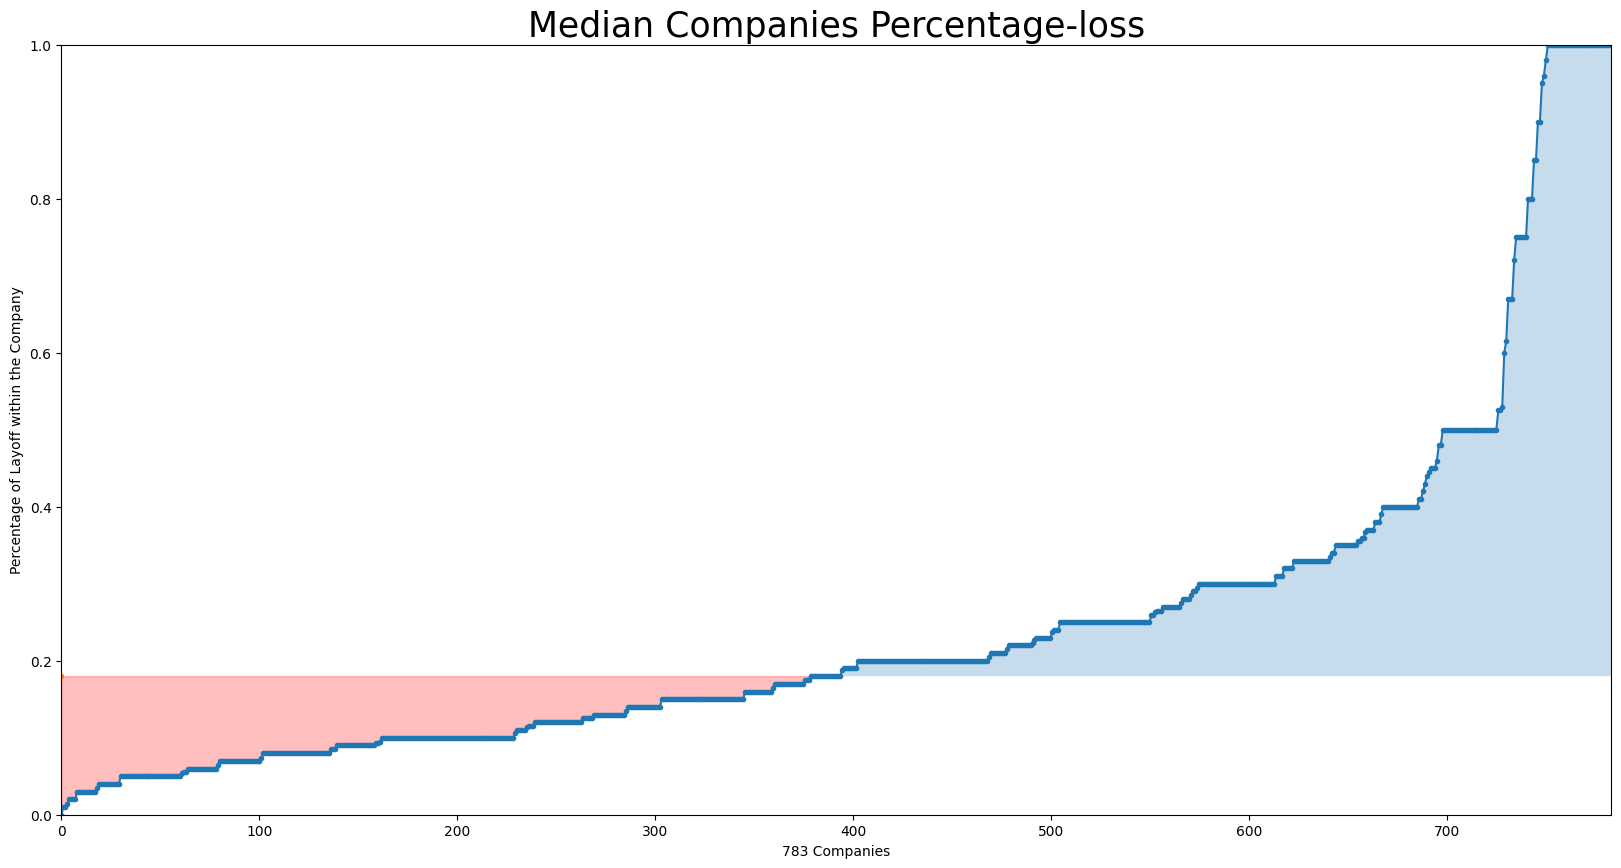

In [166]:
ig = plt.figure(figsize=(20, 10))
# ---------------------------------------------------------
# x axes = spacing the 1501 different Comapnies = n_companies = 1501 types = 1501 markers
scale = np.linspace(0, 783, n_companies.shape[0] )
# plot , same logic with addition of the median
avg_percentage = n_companies['Percentage'].mean()
avg_percentage = n_companies['Percentage'].sort_values()
plt.plot(scale, avg_percentage, median, label='Average Percentage', marker ='.')
# Adding colors above and under the median to headlight the portion of Companies above and under such value
plt.fill_between( scale, avg_percentage, median, where=(median<avg_percentage), interpolate=True, alpha=0.25)
plt.fill_between( scale, avg_percentage, median, where=(median>=avg_percentage), interpolate=True, alpha=0.25, color= 'red') 
# labelling
plt.xlabel('783 Companies')
plt.ylabel('Percentage of Layoff within the Company')
plt.xlim(0,783)
plt.ylim(0, 1)
plt.title('Median Companies Percentage-loss', fontsize= 25)

#### Percentage Distribution

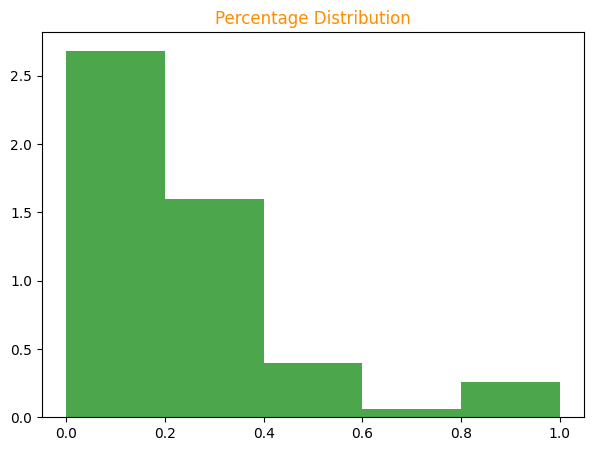

In [126]:
plt.figure(figsize=(7,5))
# plot
plt.hist(df['Percentage'], 5, density =1,facecolor="green", alpha=0.7 )
# labelling
plt.title('Percentage Distribution', color='darkorange')
plt.show()

#### Correlation between Funds Raised and Percentage of Layoff

Text(0.5, 1.0, 'Correlation Fund Raised vs Layoff Percentage')

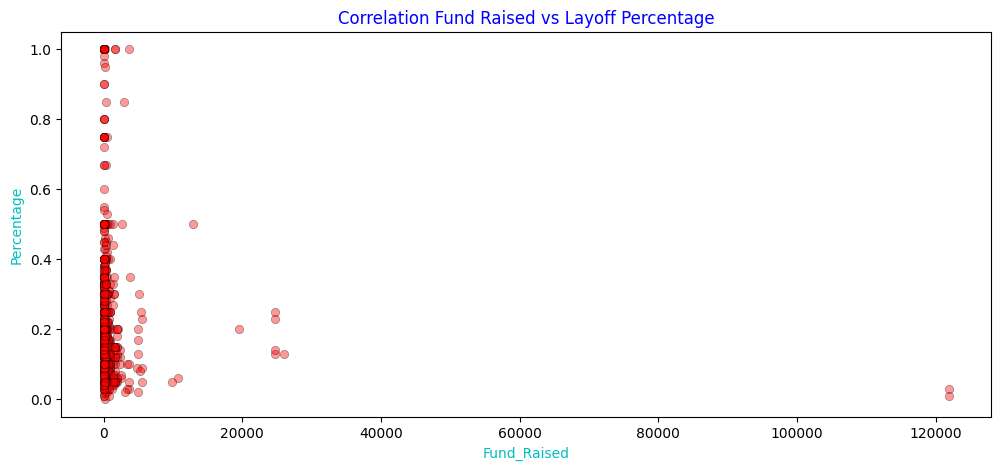

In [127]:
plt.figure(figsize=(12,5))
# DATA
x = df['Funds_Raised']
y = df['Percentage']
#------------------------------------------------------------------------------ GRAPH : SCATTER 
plt.scatter( x  , y,  edgecolor = 'black', c = 'red', linewidth = 0.5, alpha = 0.4)
# labelling& 
plt.ylabel( 'Percentage', color='c')
plt.xlabel('Fund_Raised', color= 'c')
plt.title('Correlation Fund Raised vs Layoff Percentage', color='blue')

## TIME MOST AFFECTED

Text(0, 0.5, 'Total Sales')

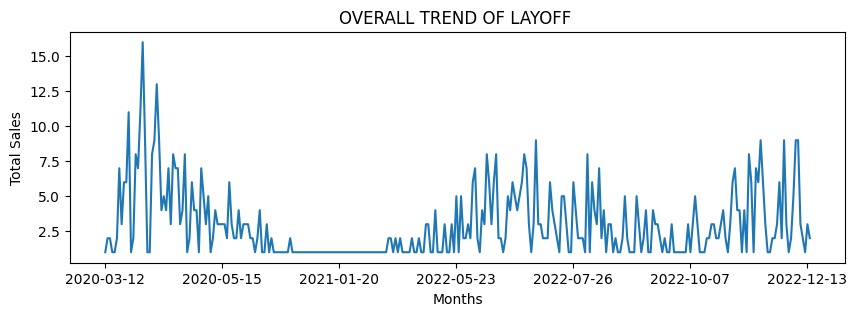

In [128]:
plt.figure(figsize = (10,3))
dates = df.groupby('Date').size()
x = df['Percentage'].mean()
y = df['Funds_Raised'].mean()

plot_time = dates.plot(title = 'OVERALL TREND OF LAYOFF ')
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Sales')

# Filtering Dates

## YEAR 2020

In [129]:
# Filtering Dates
filt =  ( df['Date'] >= '2020'  ) &   ( df['Date'] < '2021' )
df2020 = df.loc[filt]
#df2020

Text(0, 0.5, 'Total Laidoff')

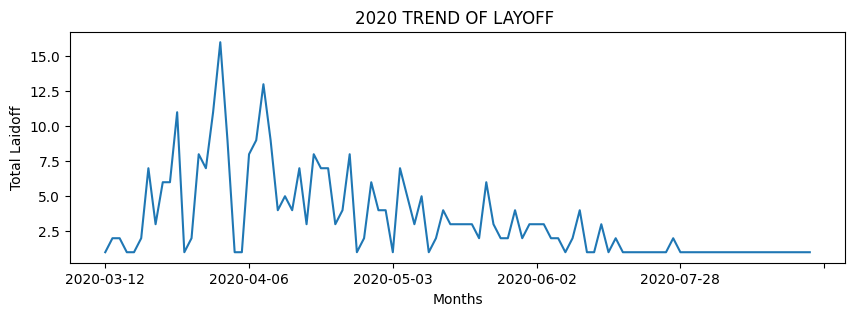

In [135]:
plt.figure(figsize = (10,3))

dates = df2020.groupby('Date').size()
plot_time = dates.plot(title = '2020 TREND OF LAYOFF ')
# labelling
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Laidoff')

## YEAR 2021

In [131]:
# Filtering Dates
filt = ( df['Date'] >= '2021' ) &  (df['Date'] < '2022' )
df2021 = df.loc[filt]
# df2021

Text(0, 0.5, 'Total Laidoff')

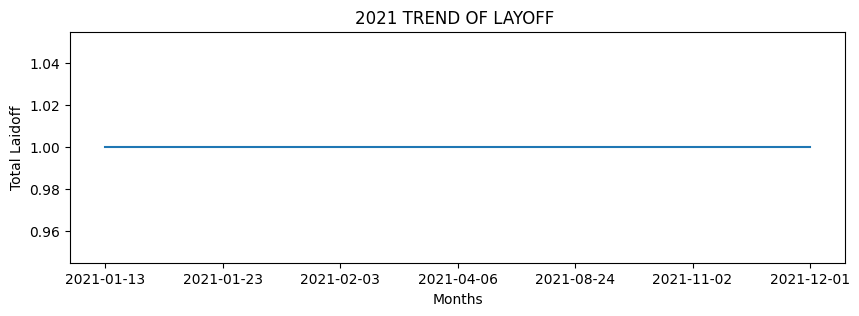

In [132]:
plt.figure(figsize = (10,3))

dates = df2021.groupby('Date').size()
plot_time = dates.plot(title = '2021 TREND OF LAYOFF ')
# 
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Laidoff')

## YEAR 2022

In [133]:
# Filtering Dates
filt =  ( df['Date'] >= '2022'  ) 
df2022 = df.loc[filt]
#df2022

Text(0, 0.5, 'Total Laidoff')

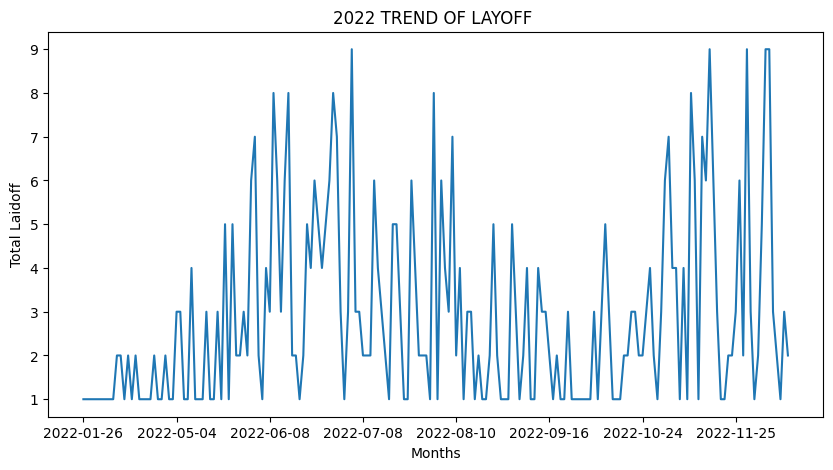

In [134]:
plt.figure(figsize = (10,5))

dates = df2022.groupby('Date').size()
plot_time = dates.plot(title = '2022 TREND OF LAYOFF ')
# Labelling
plot_time.set_xlabel('Months')
plot_time.set_ylabel('Total Laidoff')